In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist, mnist

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

In [3]:
SEED_VALUE = 42

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [4]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]

y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

print(f"\nTraining: {X_train.shape}\nValidation: {X_valid.shape}\nTesting: {X_test.shape}")


Training: (50000, 28, 28)
Validation: (10000, 28, 28)
Testing: (10000, 28, 28)


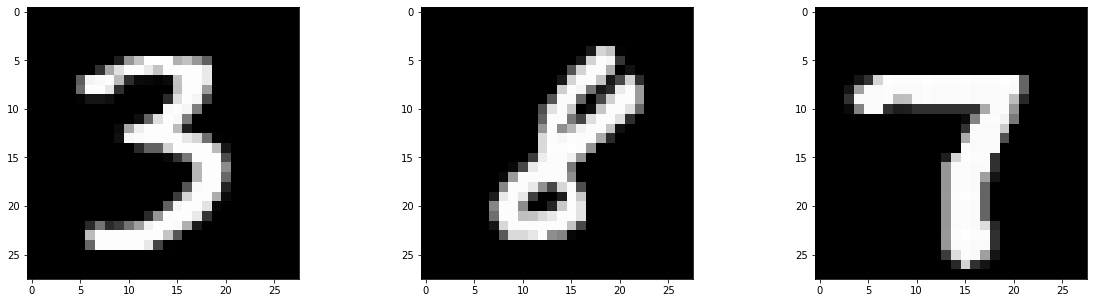

In [5]:
plt.figure(figsize=(20, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis(True)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

- Data Preprocessing.

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype('float32') / 255

X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype('float32') / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype('float32') / 255

In [7]:
#Integer labels into one-hot encoded vectors.
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

- Define the model

In [8]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
training_results = model.fit(X_train, y_train,
                             batch_size=64, epochs=21,
                             validation_data=(X_valid, y_valid))

Epoch 1/21
782/782 [==============================] - 9s 7ms/step - loss: 0.2833 - accuracy: 0.9173 - val_loss: 0.1755 - val_accuracy: 0.9450
Epoch 2/21
782/782 [==============================] - 5s 6ms/step - loss: 0.1203 - accuracy: 0.9635 - val_loss: 0.1262 - val_accuracy: 0.9641
Epoch 3/21
782/782 [==============================] - 4s 6ms/step - loss: 0.0833 - accuracy: 0.9737 - val_loss: 0.1261 - val_accuracy: 0.9622
Epoch 4/21
782/782 [==============================] - 4s 6ms/step - loss: 0.0635 - accuracy: 0.9798 - val_loss: 0.0960 - val_accuracy: 0.9734
Epoch 5/21
782/782 [==============================] - 5s 6ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0940 - val_accuracy: 0.9755
Epoch 6/21
782/782 [==============================] - 4s 6ms/step - loss: 0.0397 - accuracy: 0.9878 - val_loss: 0.0949 - val_accuracy: 0.9728
Epoch 7/21
782/782 [==============================] - 4s 5ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.0933 - val_accuracy: 0.9756
Epoch 

In [11]:
def plot_results(metrics, ylabel=None, ylim=None, metric_name=None, title=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 5))
    
    if not(isinstance(metrics, list) or isinstance(metric_name, tuple)):
        metrics = [metrics, ]
        metrics_name =[metrics_name, 1]
        
    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    plt.title(title)
    
    #Tailor x-axis tick marks.
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid()
    plt.legend(metric_name)
    plt.show()
    plt.close()

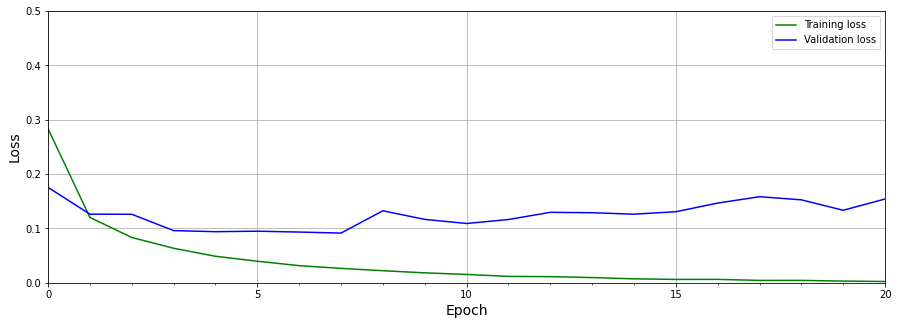

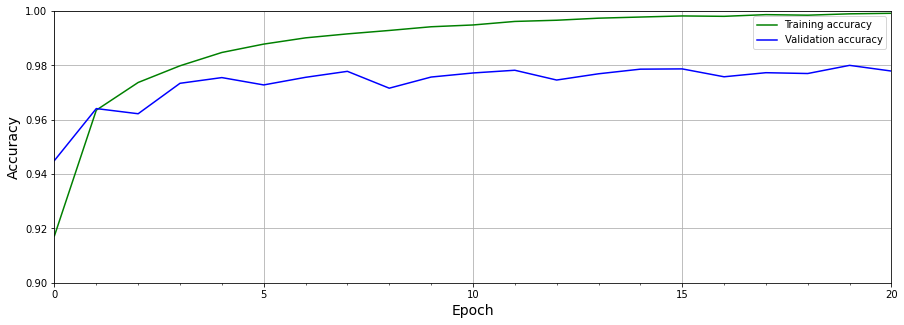

In [12]:
#Retrieve training results.
train_loss = training_results.history['loss']
train_acc  = training_results.history['accuracy']
val_loss   = training_results.history['val_loss']
val_acc    = training_results.history['val_accuracy']

plot_results([train_loss, val_loss], 
             ylabel='Loss', ylim=[0, 0.5],
             metric_name=['Training loss', 'Validation loss'], 
             color=['g', 'b'])


plot_results([train_acc, val_acc], 
             ylabel='Accuracy', ylim=[0.9, 1],
             metric_name=['Training accuracy', 'Validation accuracy'],
             color=['g', 'b'])

- Model Evaluation.

In [13]:
predictions = model.predict(X_test)

index = 0
print("Ground truth for test digit: ", y_test[index])
print('\n')
print("Predictions for each class:\n")
for i in range(10):
    print("digit: ", i, 'probability: ', predictions[index][i])

313/313 [==============================] - 1s 2ms/step
Ground truth for test digit:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Predictions for each class:

digit:  0 probability:  9.6932956e-23
digit:  1 probability:  8.9234054e-17
digit:  2 probability:  2.7986809e-11
digit:  3 probability:  1.8447395e-13
digit:  4 probability:  3.156956e-23
digit:  5 probability:  1.57009e-24
digit:  6 probability:  8.580979e-29
digit:  7 probability:  0.99999994
digit:  8 probability:  9.107016e-23
digit:  9 probability:  3.9906435e-16


- Confusion matrix.

In [14]:
predictions = model.predict(X_test)

#For each sample image in the test dataset, select the class label with the highest probability.
prediction_labels = [np.argmax(i) for i in predictions]

313/313 [==============================] - 1s 2ms/step


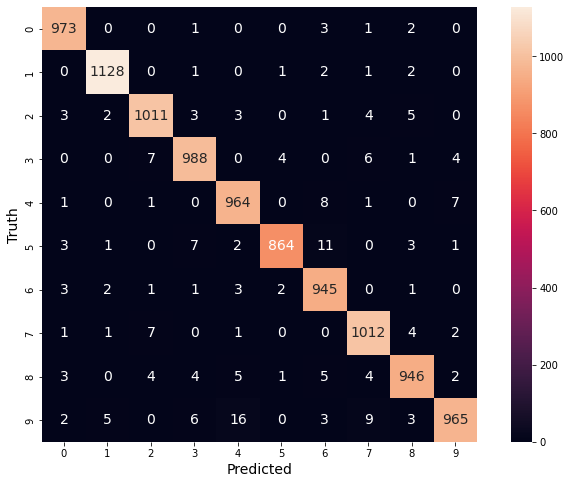

In [24]:
#Convert one-hot encoded target back to integer.
y_test_integer = tf.argmax(y_test, axis=1)

#Generate a confusion matrix.
cm = tf.math.confusion_matrix(labels=y_test_integer, predictions=prediction_labels)

#Plot it as a heatmat.
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', square=True, annot_kws={'size':14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()